# Resaux de neurones en R avec Keras 

## Importation et division en train / test

In [5]:
library(keras)
# chargement de mnist dataset inclu dans le package keras
data<-dataset_mnist()

# Training Data
train_x<-data$train$x
train_y<-data$train$y

# Test Data
test_x<-data$test$x
test_y<-data$test$y

### Visualisation de premiers 10 chiffres

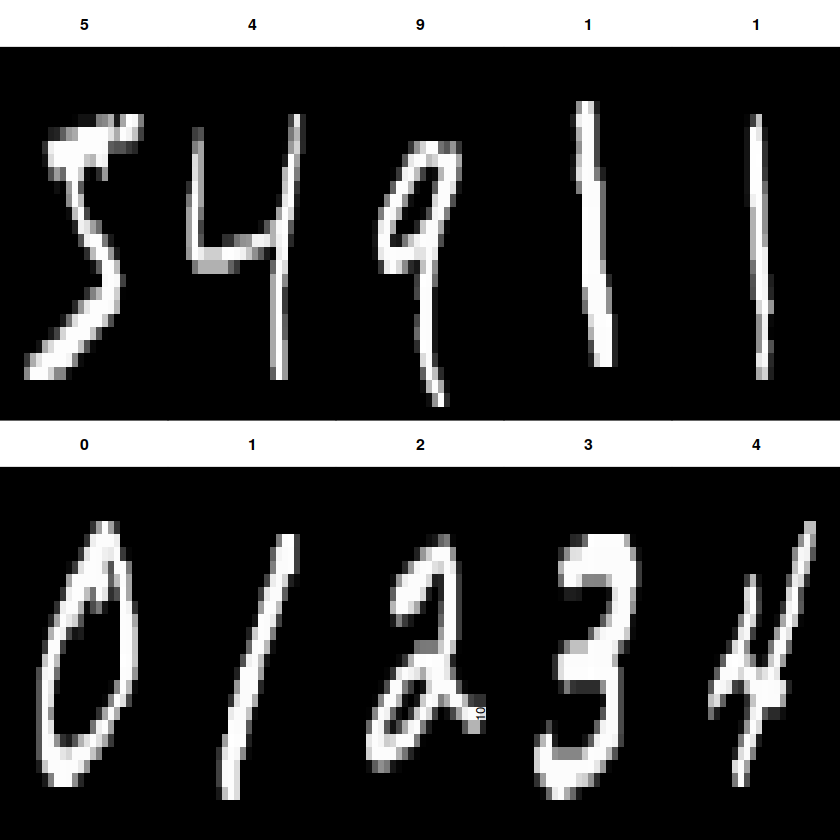

In [6]:

par(mfcol=c(2,5))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')
for (idx in 1:10) { 
    im <- train_x[idx,,]
    im <- t(apply(im, 2, rev)) 
    image(1:28, 1:28, im, col=gray((0:255)/255), 
          xaxt='n', main=paste(train_y[idx]))
}

### Convertation un tableau 2D en un tableau 1D pour alimenter le MLP /Multilayer Perceptron/ et normaliser la matrice

In [7]:
train_x <- array(as.numeric(train_x), dim = c(dim(train_x)[[1]], 784))
test_x <- array(as.numeric(test_x), dim = c(dim(test_x)[[1]], 784))

train_x <- train_x / 255
test_x <- test_x / 255

cat(dim(train_x)[[1]], 'train samples\n')#60000 train examples
cat(dim(test_x)[[1]], 'test samples\n')#10000 test examples

60000 train samples
10000 test samples


#### Convertir des vecteurs de classe en matrices de classe binaire

In [8]:
train_y<-to_categorical(train_y,10)
test_y<-to_categorical(test_y,10)

#### Définir maintenant un modèle séquentiel MLP keras contenant une pile linéaire de couches

In [9]:
model <- keras_model_sequential()

### Définition du modèle avec 1 couche d'entrée [256 neurones], 1 couche cachée [128 neurones] et 1 couche de sortie [10 neurones] soit un nombre de chiffres de 0 à 9

In [10]:
model %>% 
  #Couche d'entrée-256 unités
  #Ajouter une couche NN fortement connectée à une sortie
  layer_dense(units=32,activation="relu",input_shape=c(784))  %>%

  
  #couche de sortie
  layer_dense(units=10,activation="softmax") 
  #activation softmax pour la couche Output qui calcule les probabilités pour les classes
  

#Summary du modèle
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 32)                      25120       
________________________________________________________________________________
dense_1 (Dense)                     (None, 10)                      330         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
________________________________________________________________________________


### Compilation du modèle et optimisation du modèle. Configurer un modèle Keras pour la formation à l'aide de compile()

In [11]:
model %>%
  compile(loss ="categorical_crossentropy",
          optimizer = "adam",
          metrics= c("accuracy"))


### Maintenant, on forme le modèle sur l'ensemble de données de formation. 
#### epochs = Nombre d'itérations sur un ensemble de données
#### batchsize = Nombre d'échantillons par mise à jour de gradient.

In [12]:
model_fit<-model %>% fit(train_x, train_y, epochs = 5, batch_size = 128,
                       callbacks = callback_tensorboard(log_dir = "logs/run_b"),
                       validation_split = 0.2)

#### Après l'entrainement - le modèle donne les sorties suivants

In [13]:
model_fit$params 


$batch_size
[1] 128

$epochs
[1] 10

$steps
[1] 375

$samples
[1] 48000

$verbose
[1] 0

$do_validation
[1] TRUE

$metrics
[1] "loss"         "accuracy"     "val_loss"     "val_accuracy"

#### Métriques de perte /loss/ et de précision /accuracy/ pour chaque époque (itération sur les données d'entraînement)

In [14]:
res<-data.frame(cbind(model_fit$metrics$accuracy, model_fit$metrics$loss, 
                      model_fit$metrics$val_accuracy, model_fit$metrics$val_loss))
colnames(res)<-c("Accuracy", "Loss", "Val_Accuracy", "Val_Locc" )
res

Accuracy,Loss,Val_Accuracy,Val_Locc
<dbl>,<dbl>,<dbl>,<dbl>
0.8479375,0.5780850,0.9174167,0.2935965
0.9224375,0.2739995,0.9354166,0.2324495
0.9361666,0.2266401,0.9413334,0.2080557
0.9433750,0.1981268,0.9475833,0.1870044
0.9493542,0.1762473,0.9516667,0.1739648
0.9544584,0.1589999,0.9535000,0.1651370
0.9580417,0.1460673,0.9545000,0.1597132
0.9606042,0.1339032,0.9571667,0.1518909
0.9642708,0.1240820,0.9562500,0.1511731


#### Visualisation - époque vs acc et perte

[1] 1

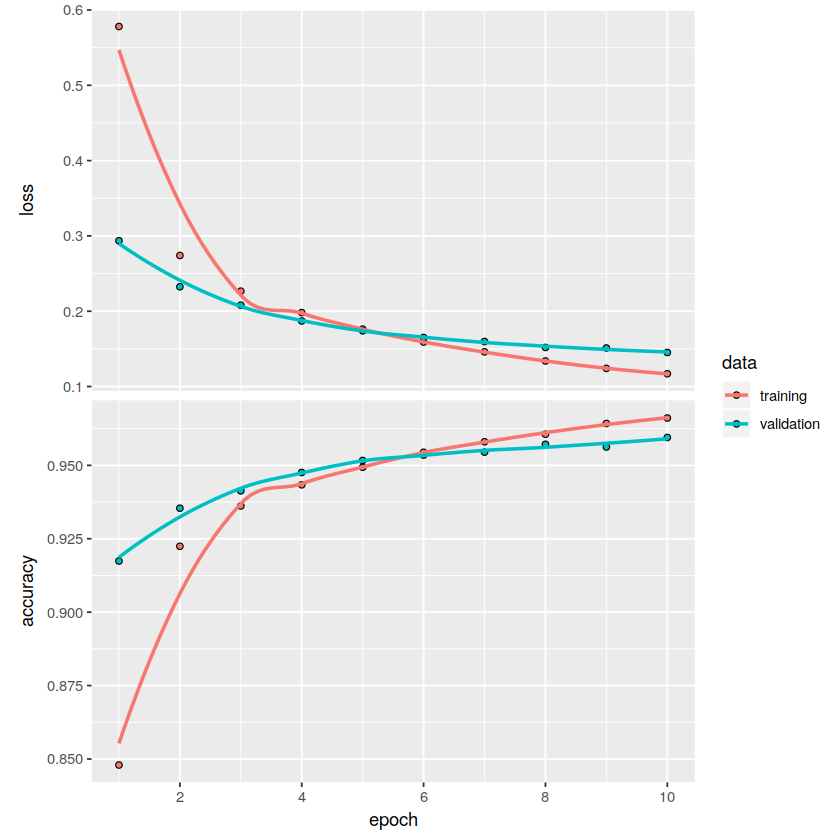

In [15]:
plot(model_fit,labels=T)
which.min(model_fit$metrics$acc)

#### Visualisation - Précision minimale pour la première époque et maximale pour la dernière époque-10

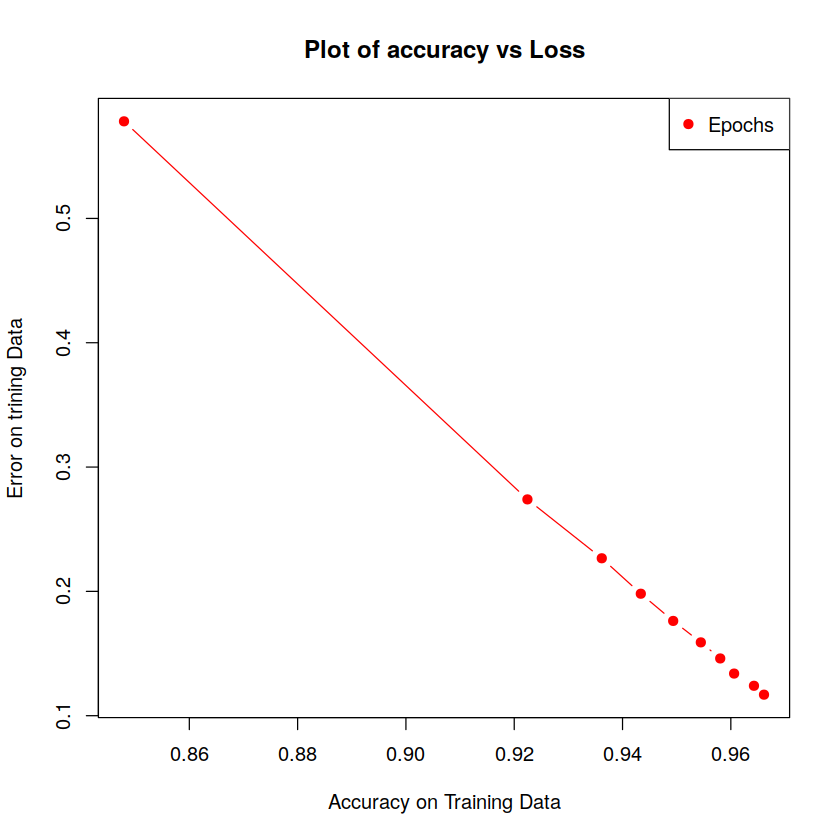

In [16]:
plot(x = model_fit$metrics$acc,y = model_fit$metrics$loss,
     pch=19,col='red',type='b',
     ylab="Error on trining Data",xlab="Accuracy on Training Data")
title("Plot of accuracy vs Loss")
legend("topright",c("Epochs"),col="red",pch=19)

## Évaluation du modèle sur l'ensemble de données de test

In [17]:
score <- model %>% 
  evaluate(test_x,test_y,batch_size=128)

score

$loss
[1] 0.1396214

$accuracy
[1] 0.9593

#### **La précision et la perte des prévisions peuvent varier à chaque lancement**. 